### DataScience. Работа на интенсиве SkillBox
***
Анализ статистики промышленного производства производства электроэнергии и газа в США 1940-2020 гг

Источник - [Board of Governors of the Federal Reserve System (US)](https://fred.stlouisfed.org/series/IPG2211A2N)

In [1]:
# подключение необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# загрузка датасета
data = pd.read_excel('IPG2211A2N.xls', skiprows = 10, columns = ['date', 'production'])
data.head(5)

,observation_date,IPG2211A2N
0,1939-01-01,3.3842
1,1939-02-01,3.4100
2,1939-03-01,3.4875
3,1939-04-01,3.5133
4,1939-05-01,3.5133


In [3]:
# проверка качества данных - ненулевые значения отсутствуют
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  972 non-null    datetime64[ns]
 1   IPG2211A2N        972 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.3 KB


In [4]:
# основные параметры датасета - общее количество данных, среднее, минимум, максимум, квантили
data.describe()

,IPG2211A2N
count,972.000000
mean,54.801967
std,35.497633
min,3.384200
25%,19.581700
50%,55.023450
75%,87.855800
max,128.907100


In [5]:
# преобразуем индекс в timestamp для удобства
data['date'] = pd.to_datetime(data['observation_date'], dayfirst=True)  
data = data.set_index('date') 
del data['observation_date']
data.head(5)

,IPG2211A2N
date,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


Text(0, 0.5, 'Index 2012=100%')

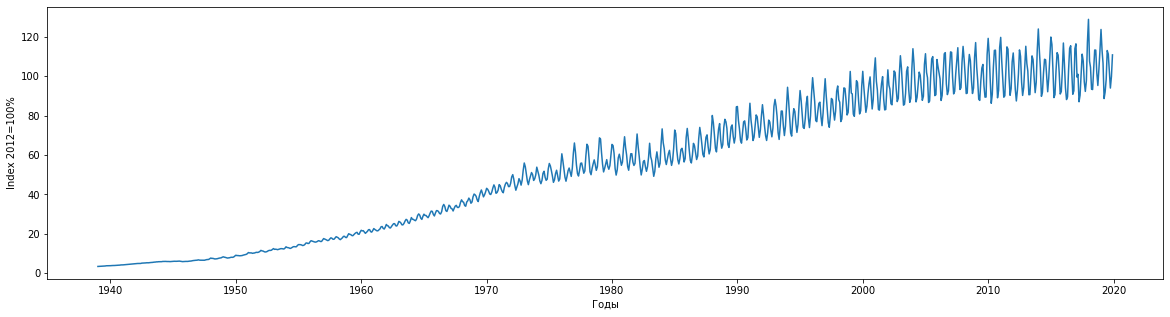

In [6]:
# график
plt.figure(figsize=(20, 5))
plt.plot(data.index, data['IPG2211A2N'])
plt.xlabel('Годы')
plt.ylabel('Index 2012=100%')

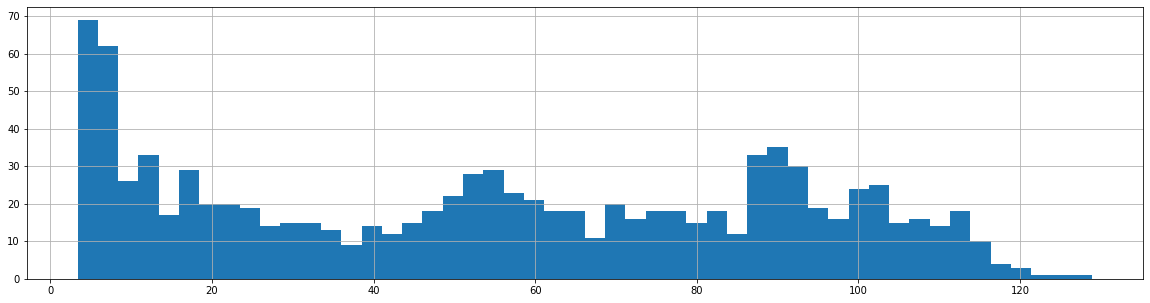

In [7]:
# гистограмма
data['IPG2211A2N'].hist(bins = 50, figsize = (20, 5))

In [8]:
# Просмотр датасета за 5 последних лет для выявления закономерностей
data_last5year = data[data.index > pd.Timestamp(year = 2015, month = 1, day = 1)]
data_last5year.head(5)

,IPG2211A2N
date,
2015-02-01,116.1393
2015-03-01,104.0218
2015-04-01,89.1544
2015-05-01,90.6950
2015-06-01,102.8863


Text(0, 0.5, 'Index 2012=100%')

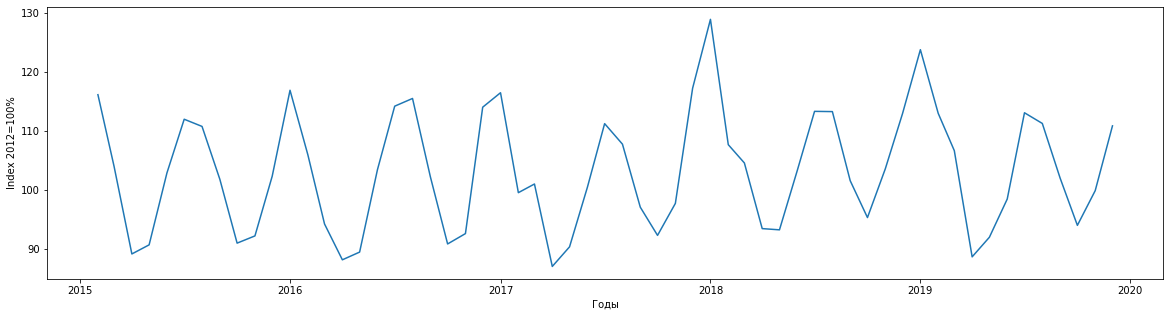

In [9]:
# График за 5 лет
plt.figure(figsize=(20, 5))
plt.plot(data_last5year.index, data_last5year['IPG2211A2N'])
plt.xlabel('Годы')
plt.ylabel('Index 2012=100%')

Text(0, 0.5, 'Index 2012=100%')

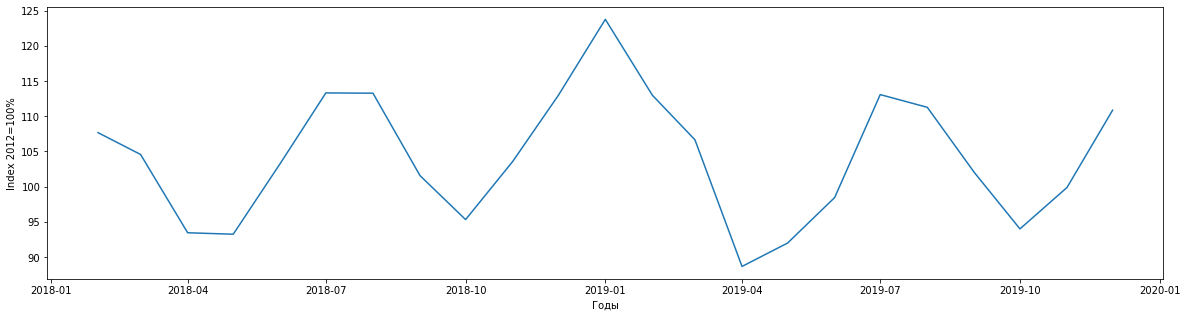

In [10]:
# И за два года
data_last2year = data[data.index > pd.Timestamp(year = 2018, month = 1, day = 1)]
plt.figure(figsize=(20, 5))
plt.plot(data_last2year.index, data_last2year['IPG2211A2N'])
# Подпишем оси
plt.xlabel('Годы')
plt.ylabel('Index 2012=100%')

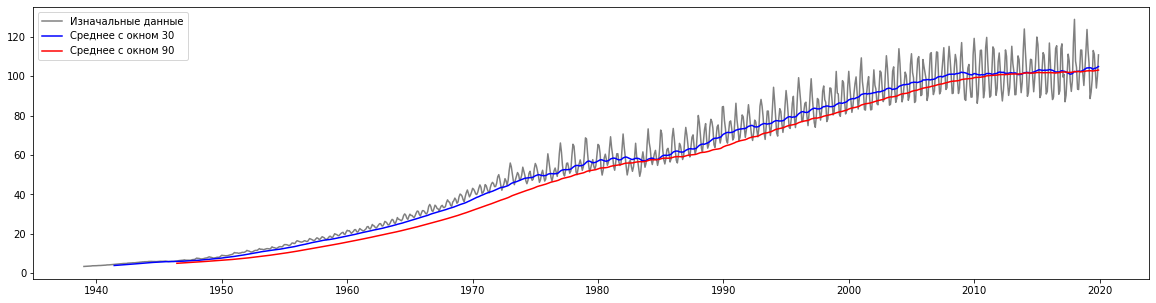

In [11]:
# Графики с усреднением по месяцам и по сезонам (по 3 месяца)
plt.figure(figsize=(20, 5))
plt.plot(data.index, data['IPG2211A2N'], color='gray', label='Изначальные данные')
plt.plot(data.index, data['IPG2211A2N'].rolling(30).mean(), color='blue', label='Среднее с окном 30')
plt.plot(data.index, data['IPG2211A2N'].rolling(90).mean(), color='red', label='Среднее с окном 90')
plt.legend()

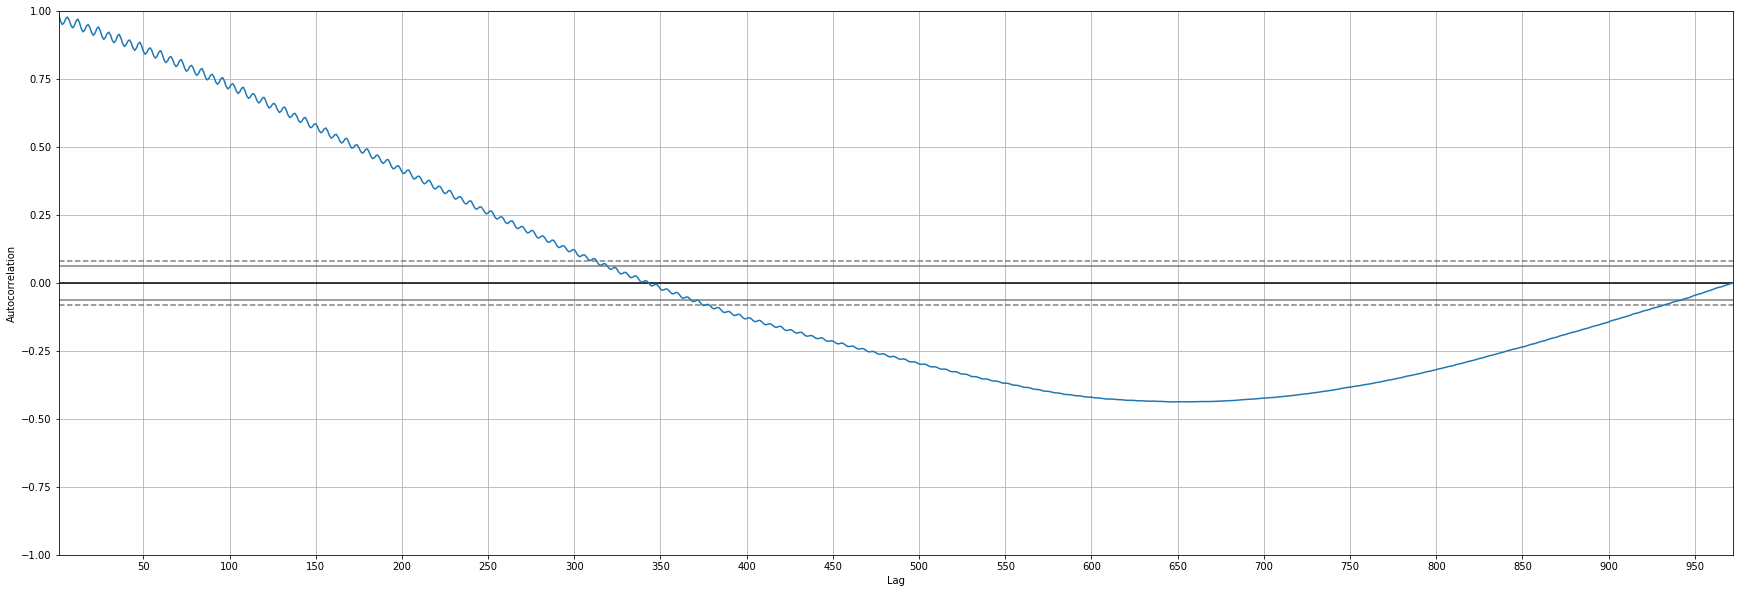

In [12]:
# Автокорреляцию в зависимости от сдвига (Lag)
plt.figure(figsize=(30, 10))
pd.plotting.autocorrelation_plot(data['IPG2211A2N'])
plt.locator_params('x', nbins=20)

In [13]:
# Поиск тренда. Линейная регрессия
from sklearn.linear_model import LinearRegression
N = len(data)  
x_range = list(range(N))
X = pd.DataFrame(x_range)

In [21]:
regressor = LinearRegression()
regressor.fit(X, data['IPG2211A2N'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
dataPredict = regressor.predict(X)
dataPredict[-5:]

array([114.51411188, 114.63812464, 114.7621374 , 114.88615016,
       115.01016292])

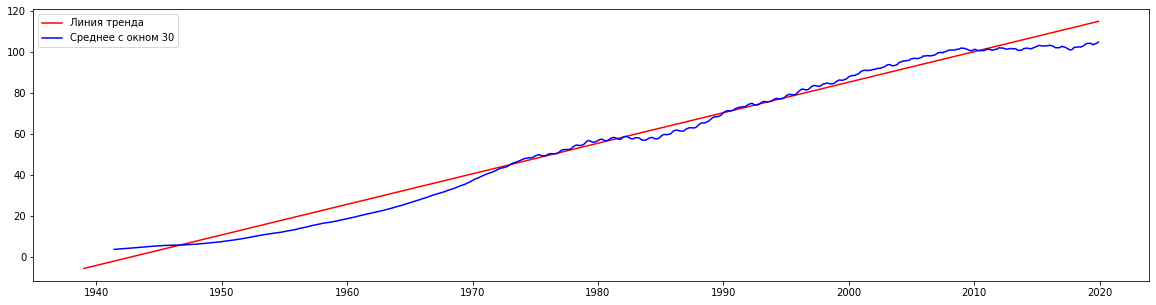

In [32]:
plt.figure(figsize=(20, 5))
plt.plot(data.index, dataPredict, color='red', label='Линия тренда')
plt.plot(data.index, data['IPG2211A2N'].rolling(30).mean(), color='blue', label='Среднее с окном 30')
plt.legend()

### Выводы
***
1. Представленный график имеет ярко выраженную сезонность. В каждом году можно выделить пиковые значения - в зимние месяцы (расходы электроэнергии и газа на отопление) и в летние (расход на кондиционирование). А также два провала, которые приходятся на апрель-май и октябрь-ноябрь. 
2. Для объективного анализа графика рекомендуется использовать средние значения, сглаженные по месяцам и сезонам. 
3. График демонстрирует выраженный тренд роста. 
4. Наложение трендовой линии на скользящую 30-дневную среднюю показывает, что отрасль демонстрировала подъем с 2000 по 2009 годы
5. С 2010 года взрывной рост производства замедлился и практически вышел на горизонтальную прямую. Это можно объяснить такими факторами, как насыщение рынка, а также развитие зелёных технологий. Крупные инвестиции в секторы солнечной и ветровой энергетики привели к сокращению темпов потребления привычных энергоресурсов, в частности, газа.  
6. Представленные данные не располагают к ожиданиям взрывного роста на данном рынке в ближайшее время. Могут быть привелекательных преимущественно для консервативных ивестиций.